# Data Exploration on FordGo Bike Data
## by: Uzedu Omoyemen Frances

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
Bay Area Bike Share is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.
</br> The Features included in the Data are as follows :

- Member Year of Birth
- Member Gender
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual/One-time)
- Trip Duration(in seconds)
- Bike ID
- Start Time and Date
- End Time and Date
- Start Station ID
- End Station ID
- Start Station Name
- End Station Name
- End Station Latitude
- End Station Longitude
- Start Station Latitude
- Start Station Longitude




## Preliminary Wrangling


In [63]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('fordgobike_data.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
sum(df.duplicated())

0

In [7]:
df.shape

(183412, 16)

In [8]:
#creating a copy dataset before cleaning
df2=df.copy()

In [9]:
#dropping columns that won't be needed for exploration
df2.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis=1, inplace=True)


In [10]:
#dropping rows with missing data
df2.dropna(inplace=True)

In [11]:
df2.shape

(174952, 11)

### What is the structure of your dataset?

> The dataset consist of 11 variables of both numeric and non-numeric type. We have two categorical variables: User_Type and Gender but they're not ordinal.


### What is/are the main feature(s) of interest in your dataset?

- What is the average trip duration, and how does it vary across some of the other features?
- What day of the week are most trips taken, and how does this vary across some other features?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Bike trip duration in minutes, Start Time, Member bith year, User Type, Member Gender.

## Univariate Exploration

What is the average trip duration? Let's look at the distribution of the trip duration in seconds
> We can see that the data is right skewed, with a long tail. Let's plot it on a logarithmic scale to get a better view.

<ErrorbarContainer object of 3 artists>

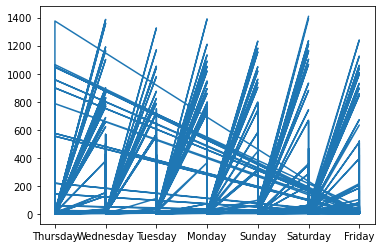

In [70]:
plt.errorbar(data=df2, x='start_day', y='duration_min')


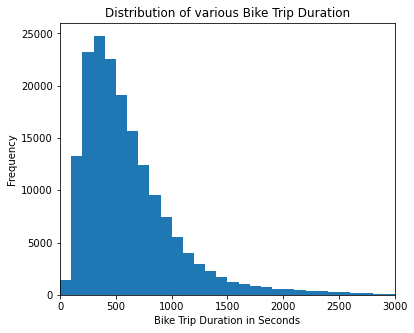

In [67]:
plt.figure(figsize=(6,5))
bins = np.arange(0, df2['duration_sec'].max() + 100 , 100)
plt.hist(data = df2, x = 'duration_sec' , bins = bins)
plt.xlim(0,3000)
plt.title('Distribution of various Bike Trip Duration')
plt.xlabel('Bike Trip Duration in Seconds')
plt.ylabel('Frequency');

> From the plot below we can say that the average bike duration in seconds was 600 seconds which is 10 minutes, this is to say most people tend to take short trips.

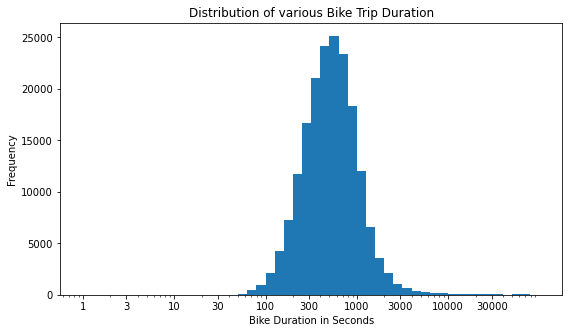

In [13]:
#plotting on a logarithmic scale
logsize=0.1
bins = 10**np.arange(0, 5+logsize, logsize)

plt.figure(figsize=[9,5])
ticks=[1,3,10,30,100,300,1000,3000,10000,30000]
labels=['{}'. format (v) for v in ticks]
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Bike Duration in Seconds')
plt.ylabel('Frequency')
plt.title('Distribution of various Bike Trip Duration');

What can the user type distribution tell us?
> We have more subscribers than customers. The customers are temporary or one-time users while subscribers are members or frequent users.

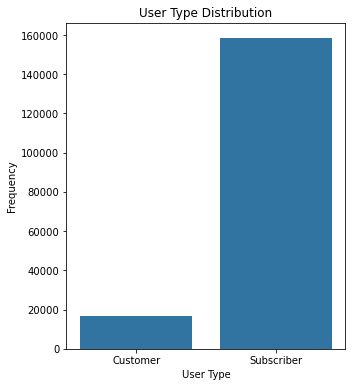

In [14]:
plt.figure(figsize=(5,6))
base=sb.color_palette()[0]
sb.countplot(data=df2, x='user_type', color=base)
plt.xlabel('User Type')
plt.ylabel('Frequency')
plt.title('User Type Distribution');

Let us see the gender distribution too
> We have more males renting bike than females. 

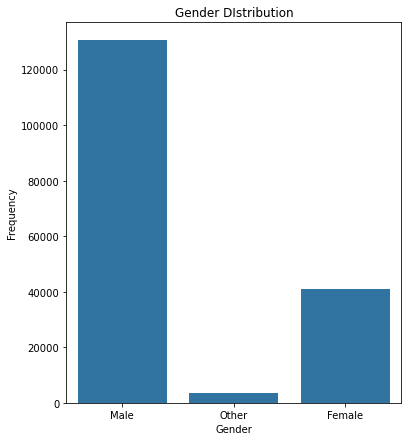

In [15]:
plt.figure(figsize=(6,7))
sb.countplot(data=df2, x='member_gender', color=base)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender DIstribution');

What is the age group that rents more bike and spends more time on trips?

In [16]:
#we would create the age from the member birth year column
df2['age']= 2019 - df2['member_birth_year']

In [17]:
#ordering the ages into groups
bins=[18,30,60,140]
labels=['Youths (18-30)', 'Middle-aged (31-60)', 'Oldies (60+)']
df2['age_group']=pd.cut(df2['age'], bins=bins, labels=labels)
df2['age_group'].value_counts()

Middle-aged (31-60)    97155
Youths (18-30)         74233
Oldies (60+)            3529
Name: age_group, dtype: int64

> Most people who rent bikes are within the age group 18-30 and 31-60. We would look more at this relationship with other features.

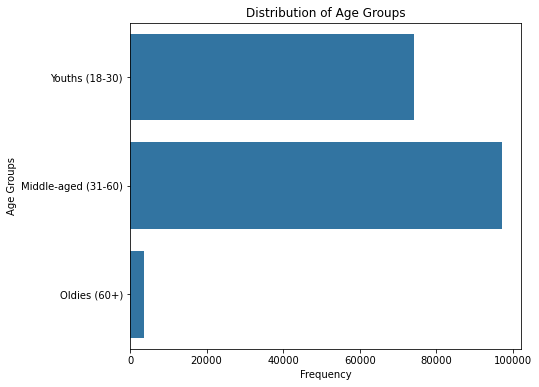

In [18]:
#plotting the age group distribution
plt.figure(figsize=(7,6))
sb.countplot(data=df2, y='age_group', color=base)
plt.ylabel('Age Groups')
plt.xlabel('Frequency')
plt.title('Distribution of Age Groups');

**What day of the week are most trips taken, and how does this vary across some other features?**

In [19]:
#let's extract the days from the start time column
df2['start_time'] = pd.to_datetime(df2['start_time'])

df2['start_day']=df2['start_time'].dt.day_name()
df2['start_day'].value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day, dtype: int64

> We can see below that most trips were taken during the week especially Thursdays and Tuesdays unlike weekend. Let us look more at the distribution with the trip duration and some other features.

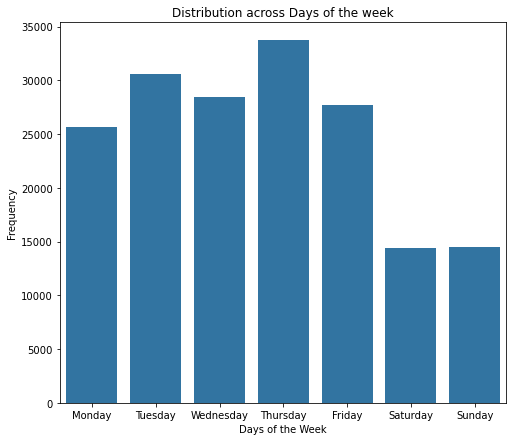

In [22]:
#plotting the distribution of the days
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

week_class=pd.api.types.CategoricalDtype(ordered=True, categories=order)
df2['start_day']=df2['start_day'].astype(week_class)

plt.figure(figsize=(8,7))
sb.countplot(data=df2, x='start_day', color=base)
plt.title('Distribution across Days of the week')
plt.xlabel('Days of the Week')
plt.ylabel('Frequency');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Plotting the bike trip duration without transformation gave us a right skewed distribution with a long tail. After including a log transformation to the variable we were able to see a more descriptive plot where we deduced that the length of most trips were about 600 seconds (10 minutes).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We needed to see the distribution of the trips across days of the wee. As the dataset did not include a column with that information, we extracted it from the start time column and plotted the distribution

## Bivariate Exploration

Let us explore more visualizations to understand our data.
</br> **What is the average trip duration, and how does it vary across some of the other features?**
</br> We already established that the average trip duration was about 10 minutes. Let's see the relationship of this acroos the gender, usertype and age groups

In [23]:
#converting the trip duration from seconds to minutes
df2['duration_min']=df2['duration_sec'] / 60

What is the average trip duration against User Type
>Although we have more subscribers, customers on a average tend to spend more time on trips with an average of about 24 minutes.

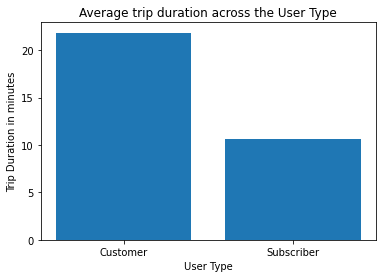

In [24]:
customer_mean=df2.query('user_type == "Customer"').duration_min.mean()
subscriber_mean=df2.query('user_type == "Subscriber"').duration_min.mean()


plt.bar(['Customer', 'Subscriber'], [customer_mean, subscriber_mean])
plt.title('Average trip duration across the User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration in minutes');

What is the average trip duration against Gender
> Also for the gender, even though the males have the higher distribution the females on an average spend more time on trips.

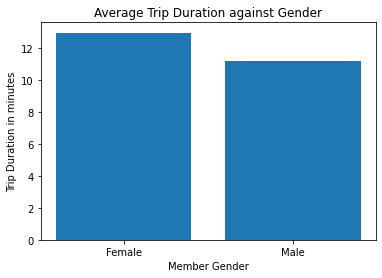

In [25]:
female_mean=df2.query('member_gender == "Female"').duration_min.mean()
male_mean=df2.query('member_gender == "Male"').duration_min.mean()


plt.bar(['Female', 'Male'], [female_mean, male_mean])
plt.title('Average Trip Duration against Gender')
plt.xlabel('Member Gender')
plt.ylabel('Trip Duration in minutes');

What is the average trip duration against the Age groups
> People within the age group 60+ on an average spend more time on trips.

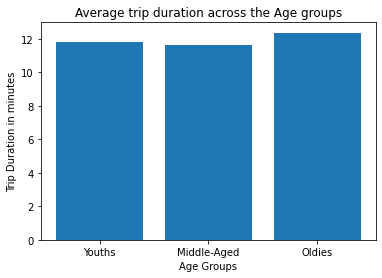

In [26]:
youth_mean=df2.query('age_group == "Youths (18-30)"').duration_min.mean()
middle_mean=df2.query('age_group == "Middle-aged (31-60)"').duration_min.mean()
oldies_mean=df2.query('age_group == "Oldies (60+)"').duration_min.mean()


plt.bar(['Youths', 'Middle-Aged', 'Oldies'], [youth_mean, middle_mean, oldies_mean])
plt.title('Average trip duration across the Age groups')
plt.xlabel('Age Groups')
plt.ylabel('Trip Duration in minutes');

**What is the distribution of the trip duration in minutes across the days of the week?**
> More time was spent on trips during the weekends unlike the weekedays.

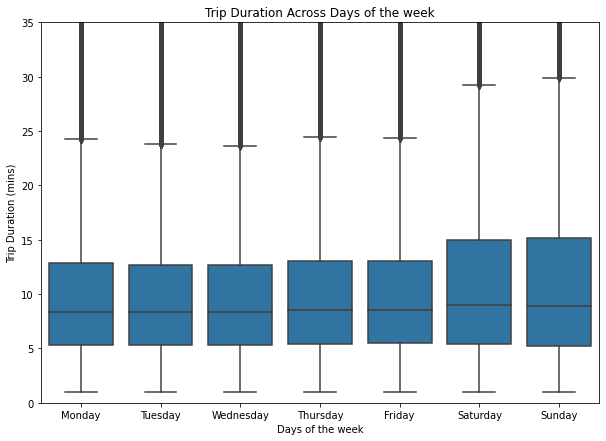

In [27]:
plt.figure(figsize=(10,7))
sb.boxplot(data=df2, x='start_day', y='duration_min', color=base)
plt.ylim(0,35)
plt.title('Trip Duration Across Days of the week')
plt.xlabel('Days of the week')
plt.ylabel('Trip Duration (mins)');

**On which day do the user type tend to rent bikes more?**
> Subscribers tend to rent more bike during weekdays, while for customers there seems to be an even distribution across all days of the week except for a little spike on Thursday.

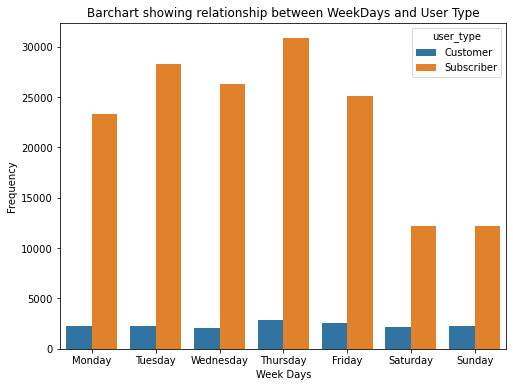

In [28]:
plt.figure(figsize=(8,6))
sb.countplot(data=df2, x='start_day', hue='user_type')
plt.title('Barchart showing relationship between WeekDays and User Type')
plt.xlabel('Week Days')
plt.ylabel('Frequency');

Let's look at some qualitative distributions, we already know the distribution of user types, gender, agre groups individually. So now we want to find out what the relationship is with each pair of these features.


**Which gender is a more frequent user of the bikes?**
>In total we have more subscribers in the genders, with the males having a higher percentage also as customers too.

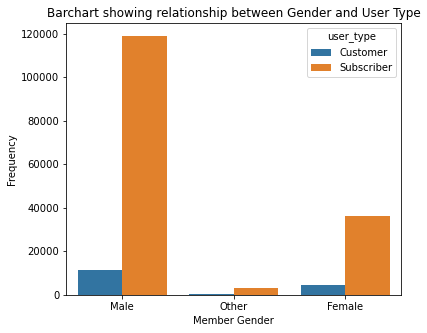

In [61]:
plt.figure(figsize=(6,5))
sb.countplot(data=df2, x='member_gender', hue='user_type')
plt.title('Barchart showing relationship between Gender and User Type')
plt.xlabel('Member Gender')
plt.ylabel('Frequency');

## Multivariate Exploration

**Relationship between trip duration across days of the week with each user type**
> Customers generally travel long distance especially during weekends, whereas the subscribers take short journeys regardless of what day of the week it is.

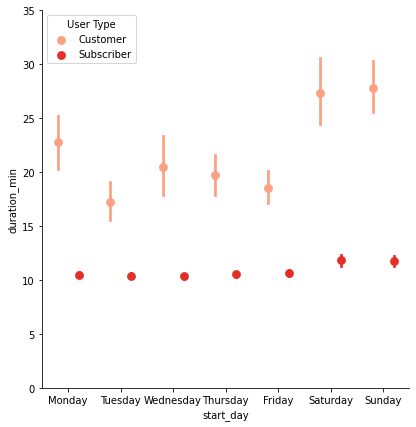

In [64]:
#using Seaborn's Pairgrid to create pointplots
def pointplot(x,y, hue, **kwargs):
    sb.pointplot(x,y, hue, palette='Reds',dodge=0.4, linestyles="")


#plt.figure(figsize = [8, 8])
ax=sb.PairGrid(data=df2, y_vars='duration_min', x_vars='start_day', hue='user_type', height=6)
ax.map(pointplot)
plt.ylim([0,35])
plt.legend(title='User Type');
plt.show;

**Relationship between trip duration across days of the week with gender**
> People who did not disclose their gender tends to spend more time on trips during the weekend. Females also spend more time on trips than males with the higher frequency of the trip duration happening during weekends. Male also seems to spend more time on trips during weekends.

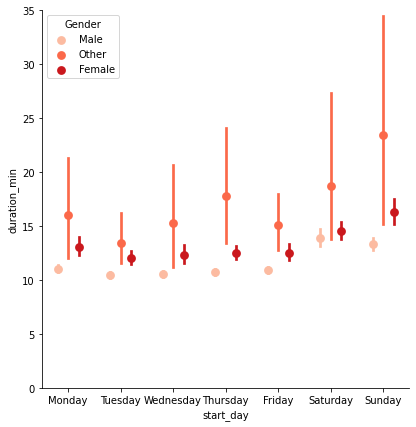

In [65]:
ax=sb.PairGrid(data=df2, y_vars='duration_min', x_vars='start_day', hue='member_gender', height=6)
ax.map(pointplot)
plt.ylim([0,35])
plt.legend(title='Gender');
plt.show;

**Relationship between trip duration across time of the week with age group.**
> We have people within the age 60+ spending more time on trips especially during weekends.

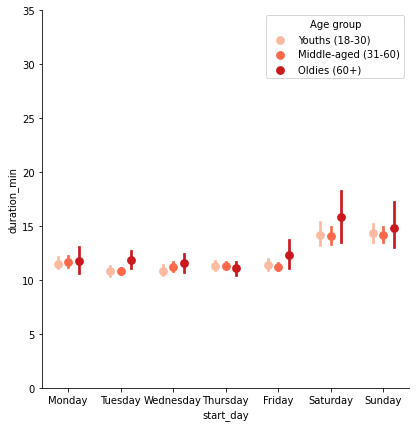

In [66]:
ax=sb.PairGrid(data=df2, y_vars='duration_min', x_vars='start_day', hue='age_group', height=6)
ax.map(pointplot)
plt.ylim([0,35])
plt.legend(title='Age group');
plt.show;

## Conclusions

- The average bike duration in seconds was 600 seconds which is 10 minutes, this is to say most people tend to take short trips.
- We have more subscribers than customers. The customers are temporary or one-time users while subscribers are members or frequent users.
- We have more males renting bike than females.
- Most people who rent bikes are within the age group 18-30 and 31-60. We would look more at this relationship with other features.
- Most trips were taken during the week especially Thursdays and Tuesdays unlike weekend.
- Although we have more subscribers, customers on a average tend to spend more time on trips with an average of about 24 minutes.
- Females on an average spend more time on trips.
- People within the age group 60+ on an average spend more time on trips.
- More time was spent on trips during the weekends unlike the weekedays.
- Subscribers tend to rent more bike during weekdays
- In total we have more subscribers in the genders, with the males having a higher percentage also as customers too.
- Customers generally travel long distance especially during weekends, whereas the subscribers take short journeys regardless of what day of the week it is.
- People who did not disclose their gender tends to spend more time on trips during the weekend. Females also spend more time on trips than males with the higher frequency of the trip duration happening during weekends. Male also seems to spend more time on trips during weekends.
- We have people within the age 60+ spending more time on trips especially during weekends.